In [0]:
ls

CONTRIBUTING.md          main.ipynb               __pycache__/
data_input.py            main.py                  randaugment.py
efficientnet_builder.py  mnist_example.py         README.md
efficientnet_model.py    noisystudent_svhn.ipynb  task_info.py
ladder_net.py            pic_500.xlsx             utils.py
LICENSE                  preprocessing.py
local_scripts/           proc_svhn.py


In [0]:
import os
os.chdir('/content/drive/My Drive/final_code/noisystudent-master') # root dictionary, the parent folder root of train and test folder
os.getcwd()

'/content/drive/My Drive/final_code/noisystudent-master'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import tensorflow as tf
tf.__version__

'1.15.2'

In [0]:
import sys

sys.path[0]='/tensorflow-1.15.2/python3.6'
sys.path

In [0]:
from __future__ import print_function

from keras.datasets import mnist
import keras
import random
from sklearn.metrics import accuracy_score
import numpy as np

from ladder_net import get_ladder_network_fc

inp_size = 28*28 # size of mnist dataset 
n_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, inp_size).astype('float32')/255
x_test  = x_test.reshape(10000,  inp_size).astype('float32')/255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test,  n_classes)

idxs_label = range(x_train.shape[0])
idxs_unlabel = range(x_train.shape[0])
size_list=[1,10,50,100,250,500,1000,1500,3000,5000,7500,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,59500]
acc_list=[]
labeled_size=500
for unlabel_size in size_list:
  random.seed(0)
  idxs_label = np.random.choice(x_train.shape[0], labeled_size, replace=False)
  random.seed(1)
  idxs_unlabel = np.random.choice(x_train.shape[0], unlabel_size, replace=False)
  x_train_unlabeled = x_train[idxs_unlabel]
  y_train_unlabeled = y_train[idxs_unlabel]
  x_train_labeled   = x_train[idxs_label]
  y_train_labeled   = y_train[idxs_label]
  if unlabel_size>=labeled_size:
    n_rep = x_train_unlabeled.shape[0] // x_train_labeled.shape[0]
    x_train_labeled_rep = np.concatenate([x_train_labeled]*n_rep)
    y_train_labeled_rep = np.concatenate([y_train_labeled]*n_rep)
  else:
    n_rep = x_train_labeled.shape[0] // x_train_unlabeled.shape[0]
    x_train_unlabeled_rep = np.concatenate([x_train_unlabeled]*n_rep)
    y_train_unlabeled_rep = np.concatenate([y_train_unlabeled]*n_rep)
  
  model = get_ladder_network_fc(layer_sizes=[inp_size, 1000, 500, 250, 250, 250, n_classes])

  # train the model for 10 epochs
  for _ in range(10):
      if unlabel_size>=labeled_size:
        model.fit([x_train_labeled_rep, x_train_unlabeled], y_train_labeled_rep, epochs=1)
      else:
        model.fit([x_train_labeled, x_train_unlabeled_rep], y_train_labeled, epochs=1)
      y_test_pr = model.test_model.predict(x_test, batch_size=100)
      acc=accuracy_score(y_test.argmax(-1), y_test_pr.argmax(-1))
      print("Test accuracy : %f" % acc)
  acc_list.append(acc)

Epoch 1/1
500/500 [==============================] - 47s 95ms/step - loss: 61.6274 - acc: 0.5040 - den_loss: 60.0070
Test accuracy : 0.720300
Epoch 1/1
500/500 [==============================] - 1s 1ms/step - loss: 10.3783 - acc: 0.6400 - den_loss: 9.2266
Test accuracy : 0.771200
Epoch 1/1
500/500 [==============================] - 1s 2ms/step - loss: 7.8984 - acc: 0.6820 - den_loss: 6.7851
Test accuracy : 0.770200
Epoch 1/1
500/500 [==============================] - 1s 1ms/step - loss: 6.3657 - acc: 0.7280 - den_loss: 5.3516
Test accuracy : 0.798000
Epoch 1/1
500/500 [==============================] - 1s 2ms/step - loss: 4.9233 - acc: 0.7260 - den_loss: 3.9208
Test accuracy : 0.825500
Epoch 1/1
500/500 [==============================] - 1s 2ms/step - loss: 3.6436 - acc: 0.7360 - den_loss: 2.6879
Test accuracy : 0.823200
Epoch 1/1
500/500 [==============================] - 1s 2ms/step - loss: 2.6031 - acc: 0.7780 - den_loss: 1.7224
Test accuracy : 0.828100
Epoch 1/1
500/500 [==========

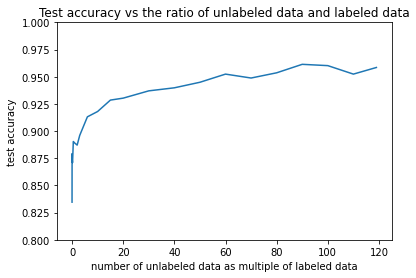

In [0]:
import matplotlib.pyplot as plt
size_list_plot=np.array(size_list)
plt.plot(size_list_plot/500, acc_list)  
plt.title("Test accuracy vs the ratio of unlabeled data and labeled data")
plt.xlabel("number of unlabeled data as multiple of labeled data")
plt.ylabel("test accuracy")

plt.ylim(0.8, 1)
plt.show()  

In [0]:
print(acc_list)

[0.7407, 0.8084, 0.8477, 0.8715, 0.8735, 0.8879, 0.8754, 0.8795, 0.883, 0.8894, 0.8327, 0.8576, 0.8726, 0.8753, 0.8757, 0.88, 0.8916, 0.8808, 0.8895, 0.8828, 0.8731, 0.8839, 0.8872, 0.8946, 0.8998, 0.8991, 0.8962, 0.8964, 0.8971, 0.8996, 0.8706, 0.8748, 0.8877, 0.8974, 0.8961, 0.9005, 0.8963, 0.9052, 0.9098, 0.9076, 0.8912, 0.9031, 0.9099, 0.9173, 0.9132, 0.9242, 0.9195, 0.9252, 0.9274, 0.9324, 0.8968, 0.9141, 0.9158, 0.9281, 0.9289, 0.926, 0.9338, 0.9396, 0.9418, 0.9391, 0.9084, 0.9129, 0.9146, 0.9311, 0.9236, 0.9374, 0.9318, 0.9471, 0.9431, 0.948, 0.9072, 0.9225, 0.9279, 0.9286, 0.9445, 0.9425, 0.9453, 0.948, 0.9502, 0.9448, 0.9177, 0.9251, 0.9358, 0.938, 0.9391, 0.9457, 0.949, 0.9469, 0.9529, 0.9542, 0.9189, 0.9318, 0.9391, 0.9414, 0.9456, 0.9515, 0.9487, 0.9517, 0.951, 0.9552, 0.9058, 0.9233, 0.9297, 0.9322, 0.9431, 0.9444, 0.9522, 0.9538, 0.951, 0.9529, 0.9172, 0.9269, 0.9285, 0.9406, 0.9465, 0.9462, 0.9538, 0.9513, 0.9504, 0.9546, 0.9147, 0.9366, 0.9375, 0.9469, 0.9468, 0.9538, 0